### RQ5

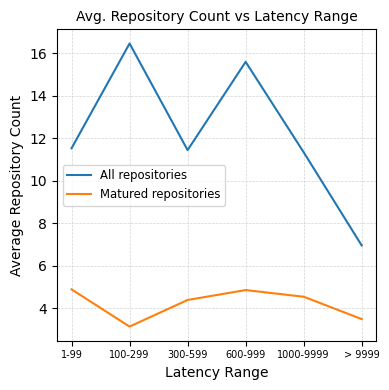

In [17]:
import mysql.connector
import matplotlib.pyplot as plt

# Connect to MySQL database
cnx = mysql.connector.connect(
    host='xxx',
    user='xxx',
    password='xxx',
    database='rapAPI2'
)

# Create cursor
cursor = cnx.cursor()

# Execute the first SQL query
query1 = """
SELECT
    latency_range,
    AVG(repo_count) AS avg_repo_count
FROM
    (SELECT
        CASE
            WHEN latency >= 1 AND latency < 100 THEN '1-99'
            WHEN latency >= 100 AND latency < 300 THEN '100-299'
            WHEN latency >= 300 AND latency < 600 THEN '300-599'
            WHEN latency >= 600 AND latency < 1000 THEN '600-999'
            WHEN latency >= 1000 AND latency < 10000 THEN '1000-9999'
            ELSE '> 9999'
        END AS latency_range,
        gd.hostname,
        COUNT(gd.repository_name) AS repo_count
    FROM
        api_info ai
    INNER JOIN
        github_details gd ON ai.hostname = gd.hostname
    GROUP BY
        latency_range,
        gd.hostname) AS subquery
GROUP BY
    latency_range
ORDER BY
    FIELD(latency_range, '1-99', '100-299', '300-599', '600-999', '1000-9999', '> 9999');
"""

cursor.execute(query1)
result1 = cursor.fetchall()

# Execute the second SQL query
query2 = """
SELECT
    latency_range,
    AVG(repo_count) AS avg_repo_count
FROM
    (SELECT
        CASE
            WHEN latency >= 1 AND latency < 100 THEN '1-99'
            WHEN latency >= 100 AND latency < 300 THEN '100-299'
            WHEN latency >= 300 AND latency < 600 THEN '300-599'
            WHEN latency >= 600 AND latency < 1000 THEN '600-999'
            WHEN latency >= 1000 AND latency < 10000 THEN '1000-9999'
            ELSE '> 9999'
        END AS latency_range,
        gd.hostname,
        COUNT(gd.repository_name) AS repo_count
    FROM
        api_info ai
    INNER JOIN
        github_details gd ON ai.hostname = gd.hostname
    WHERE
        gd.commits < 6 AND gd.contributors = 1
    GROUP BY
        latency_range,
        gd.hostname) AS subquery
GROUP BY
    latency_range
ORDER BY
    FIELD(latency_range, '1-99', '100-299', '300-599', '600-999', '1000-9999', '> 9999');
"""

cursor.execute(query2)
result2 = cursor.fetchall()

# Close cursor and connection
cursor.close()
cnx.close()

# Extracting data from results
latency_ranges1 = [row[0] for row in result1]
avg_repo_counts1 = [row[1] for row in result1]

latency_ranges2 = [row[0] for row in result2]
avg_repo_counts2 = [row[1] for row in result2]

# Plotting
plt.figure(figsize=(4, 4))

plt.plot(latency_ranges1, avg_repo_counts1, label='All repositories')
plt.plot(latency_ranges2, avg_repo_counts2, label='Matured repositories')

plt.xlabel('Latency Range')
plt.ylabel('Average Repository Count')
plt.title('Avg. Repository Count vs Latency Range', fontsize = 10)
plt.xticks(fontsize = 7)
plt.grid(True, linestyle='--', linewidth=0.5, color='lightgray')
plt.legend(loc='center left', fontsize='small')


plt.tight_layout()
plt.savefig(r'D:\RapidAPI\RapidAPI\PrunedLatency.pdf', format='pdf')
plt.show()


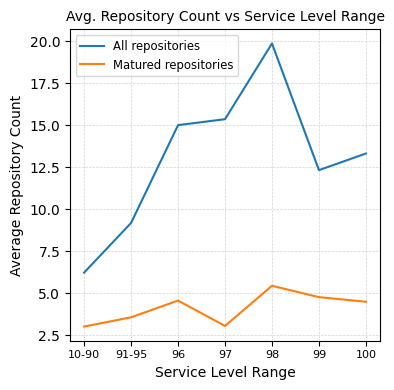

In [16]:
import mysql.connector
import matplotlib.pyplot as plt

# Connect to MySQL database
cnx = mysql.connector.connect(
    host='xxx',
    user='xxx',
    password='xxx',
    database='rapAPI2'
)

# Create cursor
cursor = cnx.cursor()

# Execute the first SQL query
query1 = """
SELECT
    service_level_range,
    AVG(repo_count) AS avg_repo_count
FROM
    (SELECT
        CASE
            WHEN ai.service_level >= 10 AND ai.service_level < 91 THEN '10-90'
            WHEN ai.service_level >= 91 AND ai.service_level < 96 THEN '91-95'
            WHEN ai.service_level >= 96 AND ai.service_level < 97 THEN '96'
            WHEN ai.service_level >= 97 AND ai.service_level < 98 THEN '97'
            WHEN ai.service_level >= 98 AND ai.service_level < 99 THEN '98'
            WHEN ai.service_level >= 99 AND ai.service_level < 100 THEN '99'
            WHEN ai.service_level = 100 THEN '100'
        END AS service_level_range,
        gd.hostname,
        COUNT(gd.repository_name) AS repo_count
    FROM
        api_info ai
    INNER JOIN
        github_details gd ON ai.hostname = gd.hostname
    GROUP BY
        service_level_range,
        gd.hostname) AS subquery
GROUP BY
    service_level_range
ORDER BY
    FIELD(service_level_range, '10-90', '91-95', '96', '97', '98', '99', '100');
"""

cursor.execute(query1)
result1 = cursor.fetchall()

# Execute the second SQL query
query2 = """
SELECT
    service_level_range,
    AVG(repo_count) AS avg_repo_count
FROM
    (SELECT
        CASE
            WHEN ai.service_level >= 10 AND ai.service_level < 91 THEN '10-90'
            WHEN ai.service_level >= 91 AND ai.service_level < 96 THEN '91-95'
            WHEN ai.service_level >= 96 AND ai.service_level < 97 THEN '96'
            WHEN ai.service_level >= 97 AND ai.service_level < 98 THEN '97'
            WHEN ai.service_level >= 98 AND ai.service_level < 99 THEN '98'
            WHEN ai.service_level >= 99 AND ai.service_level < 100 THEN '99'
            WHEN ai.service_level = 100 THEN '100'
        END AS service_level_range,
        gd.hostname,
        COUNT(gd.repository_name) AS repo_count
    FROM
        api_info ai
    INNER JOIN
        github_details gd ON ai.hostname = gd.hostname
    WHERE
        gd.commits < 6 AND gd.contributors = 1
    GROUP BY
        service_level_range,
        gd.hostname) AS subquery
GROUP BY
    service_level_range
ORDER BY
    FIELD(service_level_range, '10-90', '91-95', '96', '97', '98', '99', '100');
"""

cursor.execute(query2)
result2 = cursor.fetchall()

# Close cursor and connection
cursor.close()
cnx.close()

# Extracting data from results and filtering out None values
latency_ranges1 = [row[0] for row in result1 if row[0] is not None]
avg_repo_counts1 = [row[1] for row in result1 if row[0] is not None]

latency_ranges2 = [row[0] for row in result2 if row[0] is not None]
avg_repo_counts2 = [row[1] for row in result2 if row[0] is not None]

# Plotting
plt.figure(figsize=(4, 4))

plt.plot(latency_ranges1, avg_repo_counts1, label='All repositories')
plt.plot(latency_ranges2, avg_repo_counts2, label='Matured repositories')

plt.xlabel('Service Level Range')
plt.ylabel('Average Repository Count')
plt.title('Avg. Repository Count vs Service Level Range', fontsize = 10)
plt.xticks(fontsize = 8)
plt.grid(True, linestyle='--', linewidth=0.5, color='lightgray')
plt.legend(loc='upper left', fontsize='small')

plt.tight_layout()

plt.savefig(r'D:\RapidAPI\RapidAPI\PrunedServiceLevel.pdf', format='pdf')
plt.show()

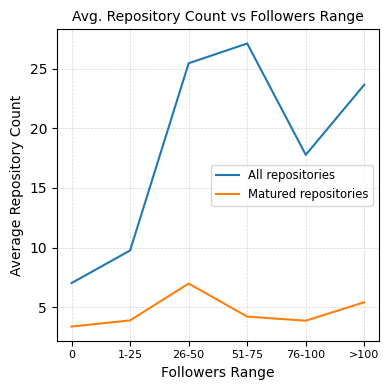

In [15]:
import mysql.connector
import matplotlib.pyplot as plt

# Connect to MySQL database
cnx = mysql.connector.connect(
    host='xxx',
    user='xxx',
    password='xxx',
    database='rapAPI2'
)

# Create cursor
cursor = cnx.cursor()

# Execute the first SQL query
query1 = """
SELECT
    followers_range,
    AVG(repo_count) AS avg_repo_count
FROM
    (SELECT
        CASE
            WHEN ad.followers = 0 THEN '0'
            WHEN ad.followers >= 1 AND ad.followers < 26 THEN '1-25'
            WHEN ad.followers >= 26 AND ad.followers < 51 THEN '26-50'
            WHEN ad.followers >= 51 AND ad.followers < 76 THEN '51-75'
            WHEN ad.followers >= 76 AND ad.followers < 101 THEN '76-100'
            WHEN ad.followers > 100 THEN '>100'
       END AS followers_range,
        gd.hostname,
        COUNT(gd.repository_name) AS repo_count,
        ai.popularity
    FROM
        api_details ad
    INNER JOIN
        api_info ai ON ad.hostname = ai.hostname
    INNER JOIN
        github_details gd ON ai.hostname = gd.hostname
    GROUP BY
        followers_range,
        gd.hostname,
        ai.popularity) AS subquery
GROUP BY
    followers_range
ORDER BY
    FIELD(followers_range, '0', '1-25', '26-50', '51-75', '76-100', '>100');
"""

cursor.execute(query1)
result1 = cursor.fetchall()

# Execute the second SQL query
query2 = """
SELECT
    followers_range,
    AVG(repo_count) AS avg_repo_count
FROM
    (SELECT
        CASE
            WHEN ad.followers = 0 THEN '0'
            WHEN ad.followers >= 1 AND ad.followers < 26 THEN '1-25'
            WHEN ad.followers >= 26 AND ad.followers < 51 THEN '26-50'
            WHEN ad.followers >= 51 AND ad.followers < 76 THEN '51-75'
            WHEN ad.followers >= 76 AND ad.followers < 101 THEN '76-100'
            WHEN ad.followers > 100 THEN '>100'
        END AS followers_range,
        gd.hostname,
        COUNT(gd.repository_name) AS repo_count,
        ai.popularity
    FROM
        api_details ad
    INNER JOIN
        api_info ai ON ad.hostname = ai.hostname
    INNER JOIN
        github_details gd ON ai.hostname = gd.hostname
        WHERE
        gd.commits < 6 AND gd.contributors = 1
    GROUP BY
        followers_range,
        gd.hostname,
        ai.popularity) AS subquery
GROUP BY
    followers_range
ORDER BY
    FIELD(followers_range, '0', '1-25', '26-50', '51-75', '76-100', '>100');
"""

cursor.execute(query2)
result2 = cursor.fetchall()

# Close cursor and connection
cursor.close()
cnx.close()

# Extracting data from results and filtering out None values
latency_ranges1 = [row[0] for row in result1 if row[0] is not None]
avg_repo_counts1 = [row[1] for row in result1 if row[0] is not None]

latency_ranges2 = [row[0] for row in result2 if row[0] is not None]
avg_repo_counts2 = [row[1] for row in result2 if row[0] is not None]

# Plotting
plt.figure(figsize=(4, 4))

plt.plot(latency_ranges1, avg_repo_counts1, label='All repositories')
plt.plot(latency_ranges2, avg_repo_counts2, label='Matured repositories')

plt.xlabel('Followers Range')
plt.ylabel('Average Repository Count')
plt.title('Avg. Repository Count vs Followers Range', fontsize = 10)
plt.xticks(fontsize = 8)
plt.grid(True, linestyle='--', linewidth=0.5, color='lightgray')
plt.legend(loc='center right', fontsize='small')

plt.tight_layout()

plt.savefig(r'D:\RapidAPI\RapidAPI\PrunedFollowers.pdf', format='pdf')
plt.show()

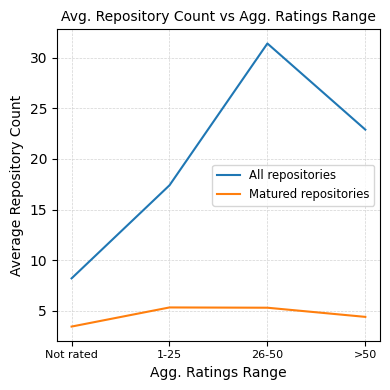

In [14]:
import mysql.connector
import matplotlib.pyplot as plt

# Connect to MySQL database
cnx = mysql.connector.connect(
    host='xxx',
    user='xxx',
    password='xxx',
    database='rapAPI2'
)

# Create cursor
cursor = cnx.cursor()

# Execute the first SQL query
query1 = """
SELECT
    ratings_range,
    AVG(repo_count) AS avg_repo_count
FROM
    (SELECT
        CASE
            WHEN ad.ratings_votes IS NULL THEN 'Not rated'
            WHEN ad.ratings_votes = 0 THEN 'Not rated'
            WHEN ad.ratings_votes >= 1 AND ad.ratings_votes < 26 THEN '1-25'
            WHEN ad.ratings_votes >= 26 AND ad.ratings_votes < 51 THEN '26-50'
            WHEN ad.ratings_votes > 50 THEN '>50'
       END AS ratings_range,
        gd.hostname,
        COUNT(gd.repository_name) AS repo_count,
        ai.popularity
    FROM
        api_details ad
    INNER JOIN
        api_info ai ON ad.hostname = ai.hostname
    INNER JOIN
        github_details gd ON ai.hostname = gd.hostname
    GROUP BY
        ratings_range,
        gd.hostname,
        ai.popularity) AS subquery
GROUP BY
    ratings_range
ORDER BY
    FIELD(ratings_range, 'Not rated', '1-25', '26-50', '>50');
"""

cursor.execute(query1)
result1 = cursor.fetchall()

# Execute the second SQL query
query2 = """
SELECT
    ratings_range,
    AVG(repo_count) AS avg_repo_count
FROM
    (SELECT
        CASE
            WHEN ad.ratings_votes IS NULL THEN 'Not rated'
            WHEN ad.ratings_votes = 0 THEN 'Not rated'
            WHEN ad.ratings_votes >= 1 AND ad.ratings_votes < 26 THEN '1-25'
            WHEN ad.ratings_votes >= 26 AND ad.ratings_votes < 51 THEN '26-50'
            WHEN ad.ratings_votes > 50 THEN '>50'
       END AS ratings_range,
        gd.hostname,
        COUNT(gd.repository_name) AS repo_count,
        ai.popularity
    FROM
        api_details ad
    INNER JOIN
        api_info ai ON ad.hostname = ai.hostname
    INNER JOIN
        github_details gd ON ai.hostname = gd.hostname
        WHERE
        gd.commits < 6 AND gd.contributors = 1
    GROUP BY
        ratings_range,
        gd.hostname,
        ai.popularity) AS subquery
GROUP BY
    ratings_range
ORDER BY
    FIELD(ratings_range, 'Not rated', '1-25', '26-50', '>50');
"""

cursor.execute(query2)
result2 = cursor.fetchall()

# Close cursor and connection
cursor.close()
cnx.close()

# Extracting data from results and filtering out None values
latency_ranges1 = [row[0] for row in result1 if row[0] is not None]
avg_repo_counts1 = [row[1] for row in result1 if row[0] is not None]

latency_ranges2 = [row[0] for row in result2 if row[0] is not None]
avg_repo_counts2 = [row[1] for row in result2 if row[0] is not None]

# Plotting
plt.figure(figsize=(4, 4))

plt.plot(latency_ranges1, avg_repo_counts1, label='All repositories')
plt.plot(latency_ranges2, avg_repo_counts2, label='Matured repositories')

plt.xlabel('Agg. Ratings Range')
plt.ylabel('Average Repository Count')
plt.title('Avg. Repository Count vs Agg. Ratings Range', fontsize = 10)
plt.xticks(fontsize = 8)
plt.grid(True, linestyle='--', linewidth=0.5, color='lightgray')
plt.legend(loc='center right', fontsize='small')

plt.tight_layout()
plt.savefig(r'D:\RapidAPI\RapidAPI\PrunedAggratings.pdf', format='pdf')
plt.show()

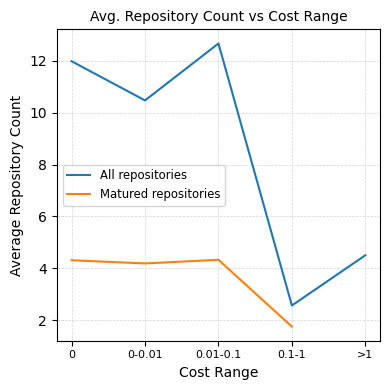

In [13]:
import mysql.connector
import matplotlib.pyplot as plt

# Connect to MySQL database
cnx = mysql.connector.connect(
    host='xxx',
    user='xxx',
    password='xxx',
    database='rapAPI2'
)

# Create cursor
cursor = cnx.cursor()

# Execute the first SQL query
query1 = """
SELECT
    pricing_range,
    AVG(repo_count) AS avg_repo_count
FROM
    (SELECT
        CASE
            WHEN calculated_cost = 0 THEN '0'
            WHEN calculated_cost > 0 AND calculated_cost <= 0.01 THEN '0-0.01'
            WHEN calculated_cost > 0.01 AND calculated_cost <= 0.1 THEN '0.01-0.1'
            WHEN calculated_cost > 0.1 AND calculated_cost <= 1 THEN '0.1-1'
            ELSE '>1'
        END AS pricing_range,
        gd.hostname,
        COUNT(gd.repository_name) AS repo_count
    FROM
        api_pricing ai
    INNER JOIN
        github_details gd ON ai.hostname = gd.hostname

    GROUP BY
        pricing_range,
        gd.hostname) AS subquery
GROUP BY
    pricing_range
ORDER BY
    FIELD(pricing_range, '0', '0-0.01', '0.01-0.1', '0.1-1', '>1');
"""

cursor.execute(query1)
result1 = cursor.fetchall()

# Execute the second SQL query
query2 = """
SELECT
    pricing_range,
    AVG(repo_count) AS avg_repo_count
FROM
    (SELECT
        CASE
            WHEN calculated_cost = 0 THEN '0'
            WHEN calculated_cost > 0 AND calculated_cost <= 0.01 THEN '0-0.01'
            WHEN calculated_cost > 0.01 AND calculated_cost <= 0.1 THEN '0.01-0.1'
            WHEN calculated_cost > 0.1 AND calculated_cost <= 1 THEN '0.1-1'
            ELSE '>1'
        END AS pricing_range,
        gd.hostname,
        COUNT(gd.repository_name) AS repo_count
    FROM
        api_pricing ai
    INNER JOIN
        github_details gd ON ai.hostname = gd.hostname
       WHERE gd.commits < 6 AND gd.contributors = 1
    GROUP BY
        pricing_range,
        gd.hostname) AS subquery
GROUP BY
    pricing_range
ORDER BY
    FIELD(pricing_range, '0', '0-0.01', '0.01-0.1', '0.1-1', '>1');
"""

cursor.execute(query2)
result2 = cursor.fetchall()

# Close cursor and connection
cursor.close()
cnx.close()

# Extracting data from results and filtering out None values
latency_ranges1 = [row[0] for row in result1 if row[0] is not None]
avg_repo_counts1 = [row[1] for row in result1 if row[0] is not None]

latency_ranges2 = [row[0] for row in result2 if row[0] is not None]
avg_repo_counts2 = [row[1] for row in result2 if row[0] is not None]

# Plotting
plt.figure(figsize=(4, 4))

plt.plot(latency_ranges1, avg_repo_counts1, label='All repositories')
plt.plot(latency_ranges2, avg_repo_counts2, label='Matured repositories')

plt.xlabel('Cost Range')
plt.ylabel('Average Repository Count')
plt.title('Avg. Repository Count vs Cost Range', fontsize = 10)
plt.xticks(fontsize = 8)
plt.grid(True, linestyle='--', linewidth=0.5, color='lightgray')
plt.legend(loc='center left', fontsize='small')

plt.tight_layout()
plt.savefig(r'D:\RapidAPI\RapidAPI\PrunedCostRange.pdf', format='pdf')
plt.show()

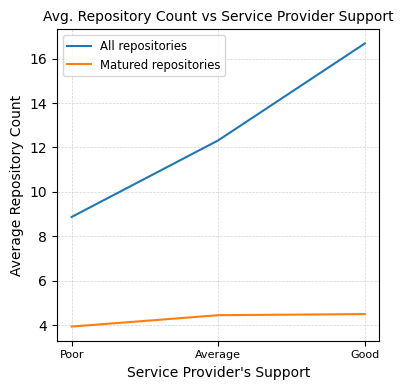

In [19]:
import mysql.connector
import matplotlib.pyplot as plt

# Connect to MySQL database
cnx = mysql.connector.connect(
    host='xxx',
    user='xxx',
    password='xxx',
    database='rapAPI2'
)

# Create cursor
cursor = cnx.cursor()

# Execute the first SQL query
query1 = """
SELECT
    doc_range,
    AVG(repo_count) AS avg_repo_count
FROM
    (SELECT
        CASE
            WHEN api.documentation > 100 AND api.resources != '' THEN 'Good'
            WHEN ((api.documentation >= 100 AND api.resources = '') OR (api.documentation < 100 AND api.resources != '')) THEN 'Average'
            WHEN api.documentation < 100 AND api.resources = '' THEN 'Poor'
        END AS doc_range,
        gd.hostname,
        COUNT(gd.repository_name) AS repo_count
    FROM
        api_details api
    INNER JOIN
        github_details gd ON api.hostname = gd.hostname
    GROUP BY
        doc_range,
        gd.hostname) AS subquery
GROUP BY
    doc_range
ORDER BY
    FIELD(doc_range, 'Poor', 'Average', 'Good');
"""

cursor.execute(query1)
result1 = cursor.fetchall()

# Execute the second SQL query
query2 = """
SELECT
    doc_range,
    AVG(repo_count) AS avg_repo_count
FROM
    (SELECT
        CASE
            WHEN api.documentation > 100 AND api.resources != '' THEN 'Good'
            WHEN ((api.documentation >= 100 AND api.resources = '') OR (api.documentation < 100 AND api.resources != '')) THEN 'Average'
            WHEN api.documentation < 100 AND api.resources = '' THEN 'Poor'
        END AS doc_range,
        gd.hostname,
        COUNT(gd.repository_name) AS repo_count
    FROM
        api_details api
    INNER JOIN
        github_details gd ON api.hostname = gd.hostname
        WHERE
        gd.commits < 6 AND gd.contributors = 1
    GROUP BY
        doc_range,
        gd.hostname) AS subquery
GROUP BY
    doc_range
ORDER BY
    FIELD(doc_range, 'Poor', 'Average', 'Good');
"""

cursor.execute(query2)
result2 = cursor.fetchall()

# Close cursor and connection
cursor.close()
cnx.close()

# Extracting data from results and filtering out None values
latency_ranges1 = [row[0] for row in result1 if row[0] is not None]
avg_repo_counts1 = [row[1] for row in result1 if row[0] is not None]

latency_ranges2 = [row[0] for row in result2 if row[0] is not None]
avg_repo_counts2 = [row[1] for row in result2 if row[0] is not None]

# Plotting
plt.figure(figsize=(4, 4))

plt.plot(latency_ranges1, avg_repo_counts1, label='All repositories')
plt.plot(latency_ranges2, avg_repo_counts2, label='Matured repositories')

plt.xlabel('Service Provider\'s Support')
plt.ylabel('Average Repository Count')
plt.title('Avg. Repository Count vs Service Provider Support', fontsize = 10)
plt.xticks(fontsize = 8)
plt.grid(True, linestyle='--', linewidth=0.5, color='lightgray')
plt.legend(loc='upper left', fontsize='small')

plt.tight_layout()
plt.savefig(r'D:\RapidAPI\RapidAPI\PrunedServProviderSupp.pdf', format='pdf')
plt.show()


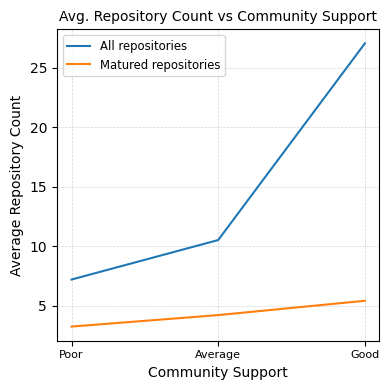

In [11]:
import mysql.connector
import matplotlib.pyplot as plt

# Connect to MySQL database
cnx = mysql.connector.connect(
    host='xxx',
    user='xxx',
    password='xxx',
    database='rapAPI2'
)

# Create cursor
cursor = cnx.cursor()

# Execute the first SQL query
query1 = """
SELECT
    doc_range,
    AVG(repo_count) AS avg_repo_count
FROM
    (SELECT
        CASE
            WHEN api.support_weight = 0 THEN 'Poor'
            WHEN api.support_weight > 100 THEN 'Good'
            WHEN api.support_weight BETWEEN 0 AND 100 THEN 'Average'
        END AS doc_range,
        gd.hostname,
        COUNT(gd.repository_name) AS repo_count
    FROM
        api_details api
    INNER JOIN
        github_details gd ON api.hostname = gd.hostname
    GROUP BY
        doc_range,
        gd.hostname) AS subquery
GROUP BY
    doc_range
ORDER BY
    FIELD(doc_range, 'Poor', 'Average', 'Good');
"""

cursor.execute(query1)
result1 = cursor.fetchall()

# Execute the second SQL query
query2 = """
SELECT
    doc_range,
    AVG(repo_count) AS avg_repo_count
FROM
    (SELECT
        CASE
            WHEN api.support_weight = 0 THEN 'Poor'
            WHEN api.support_weight > 100 THEN 'Good'
            WHEN api.support_weight BETWEEN 0 AND 100 THEN 'Average'
        END AS doc_range,
        gd.hostname,
        COUNT(gd.repository_name) AS repo_count
    FROM
        api_details api
    INNER JOIN
        github_details gd ON api.hostname = gd.hostname
        WHERE
        gd.commits < 6 AND gd.contributors = 1
    GROUP BY
        doc_range,
        gd.hostname) AS subquery
GROUP BY
    doc_range
ORDER BY
    FIELD(doc_range, 'Poor', 'Average', 'Good');
"""

cursor.execute(query2)
result2 = cursor.fetchall()

# Close cursor and connection
cursor.close()
cnx.close()

# Extracting data from results and filtering out None values
latency_ranges1 = [row[0] for row in result1 if row[0] is not None]
avg_repo_counts1 = [row[1] for row in result1 if row[0] is not None]

latency_ranges2 = [row[0] for row in result2 if row[0] is not None]
avg_repo_counts2 = [row[1] for row in result2 if row[0] is not None]

# Plotting
plt.figure(figsize=(4, 4))

plt.plot(latency_ranges1, avg_repo_counts1, label='All repositories')
plt.plot(latency_ranges2, avg_repo_counts2, label='Matured repositories')

plt.xlabel('Community Support')
plt.ylabel('Average Repository Count')
plt.title('Avg. Repository Count vs Community Support', fontsize = 10)
plt.xticks(fontsize = 8)
plt.grid(True, linestyle='--', linewidth=0.5, color='lightgray')
plt.legend(loc='upper left', fontsize='small')

plt.tight_layout()
plt.savefig(r'D:\RapidAPI\RapidAPI\PrunedCommSupp.pdf', format='pdf')
plt.show()
